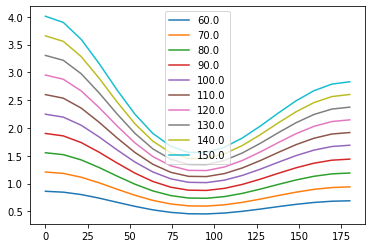

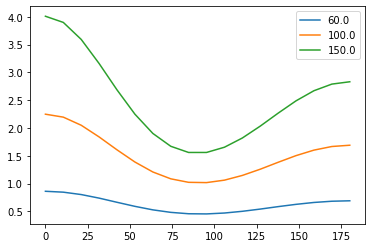

    60.0     70.0    80.0     90.0  100.0   110.0   120.0   130.0   140.0  \
0  0.862  1.20850  1.5550  1.90150  2.248  2.6002  2.9524  3.3046  3.6568   
1  0.846  1.18325  1.5205  1.85775  2.195  2.5356  2.8762  3.2168  3.5574   
2  0.803  1.11450  1.4260  1.73750  2.049  2.3576  2.6662  2.9748  3.2834   
3  0.739  1.01400  1.2890  1.56400  1.839  2.1030  2.3670  2.6310  2.8950   
4  0.664  0.89975  1.1355  1.37125  1.607  1.8226  2.0382  2.2538  2.4694   

   150.0  angle_degree  
0  4.009      0.000000  
1  3.898     10.588260  
2  3.592     21.182250  
3  3.159     31.759051  
4  2.685     42.347311  
     60.0     70.0    80.0     90.0  100.0   110.0   120.0   130.0   140.0  \
13  0.586  0.78525  0.9845  1.18375  1.383  1.5596  1.7362  1.9128  2.0894   
14  0.627  0.84600  1.0650  1.28400  1.503  1.7000  1.8970  2.0940  2.2910   
15  0.661  0.89625  1.1315  1.36675  1.602  1.8156  2.0292  2.2428  2.4564   
16  0.683  0.92900  1.1750  1.42100  1.667  1.8914  2.1158  2.3402  2.5646 

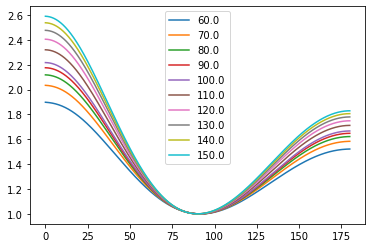

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

xsDatafile = '/Users/hkromer/02_PhD/02_Data/07.neutron_output/relative_yield_DD.xlsx'

data_rel = pd.read_excel(xsDatafile, skiprows=1)
data_rel = data_rel.iloc[:,1:]
cols = data_rel.columns.tolist()

cols = ['angle_radians' if 'Unnamed' in str(c) else str(c*1000) for c in cols ] # columns are in keV

data_rel.columns = cols
cols_to_keep = ['angle_radians', '60.0', '100.0', '150.0']
data_rel = data_rel[cols_to_keep]
data_rel['angle_degree'] = (data_rel['angle_radians']/np.pi) * 180

# columns with data
E_cols = [c for c in data_rel.columns if '0' in c]




# get intermediate values
energies = np.arange(60.0,160.0,10.0)
energies = [str(e) for e in energies]
for e in energies:
    if e in data_rel.columns:
        pass
    else:
        data_rel[e] = np.nan
E_cols_new = [c for c in data_rel.columns if '0' in c]
data_rel_new = data_rel[E_cols_new].copy().T
data_rel_new.reset_index(inplace=True)
data_rel_new['index'] = data_rel_new['index'].astype(float)
data_rel_new = data_rel_new.sort_values(by='index')
data_rel_new.reset_index(inplace=True, drop=True)
data_rel_new.set_index('index', inplace=True)
data_rel_new = data_rel_new.interpolate(method='piecewise_polynomial')

data_rel_new = data_rel_new.T
data_rel_new['angle_degree'] = data_rel['angle_degree']
# print(data_rel_new)

data_rel_new.columns = [str(c) for c in data_rel_new.columns]
E_cols_new = [c for c in data_rel_new.columns if '0' in c]


# plot
for c in E_cols_new:
    plt.plot(data_rel_new['angle_degree'].values, data_rel_new[c].values, label=c)
    
plt.legend()
plt.show()
data_rel_new.to_csv('/Users/hkromer/02_PhD/02_Data/07.neutron_output/relative_yield_DD_interpolated_not_normed.csv')
# plot
for c in E_cols:
    plt.plot(data_rel['angle_degree'].values, data_rel[c].values, label=c)
    
plt.legend()
plt.show()

# interpolate with polynomial fit
data_rel_interp = pd.DataFrame()
print(data_rel_new.head())
print(data_rel_new.tail())
for c in E_cols_new:

    poly = np.polyfit(data_rel_new['angle_degree'].values, data_rel_new[c].values,10)
    X = np.arange(0, 180+0.1, 0.1)
    poly_y = np.poly1d(poly)(X)
    data_rel_interp['angle_degree'] = X
    data_rel_interp[c] = poly_y
    # normalize to 90 degree
    normval = data_rel_interp[ data_rel_interp['angle_degree'] == 90 ].loc[:,c].values
    data_rel_interp[c] = data_rel_interp[c]/normval
    
# plot
for c in E_cols_new:
    plt.plot(data_rel_interp['angle_degree'].values, data_rel_interp[c].values, label=c)
    
plt.legend()
plt.show()


In [ ]:
outputfolder = '/Users/hkromer/polybox/Thesis/Chapters/Introduction/Figures/'
figname = 'relative_yield'

from scipy.interpolate import splrep, splev
from scipy.interpolate import splrep, splev
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from matplotlib.ticker import AutoMinorLocator

os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
%matplotlib inline


# PLOT
fig, ax1 = plt.subplots(figsize=(8, 6))

fs = 26
markersize = 8


cols_plot = ['80.0', '100.0', '120.0', '150.0']


colors = ['darkgreen', 'darkorange', 'darkblue', 'darkred']
linestyles = ['-', '--', "dotted", (0, (3, 5, 1, 5))]
linestyles = ['-', '--', "dotted", (0, (3, 5, 1, 5))]


for col, color, ls in zip(cols_plot, colors, linestyles):
    label = int(float(col))
    p1=ax1.plot(data_rel_interp['angle_degree'].values, data_rel_interp[col].values, linestyle='-', color=color, label=label, linewidth=2.5)
ax1.set_xlabel(r"\textbf{Emission angle [$^{\circ}$]}", fontsize=fs)
ax1.set_ylabel(r"$\frac{R(\theta)}{R(90^{\circ})}$ [-]", fontsize=fs)
ax1.tick_params('x', colors='black', labelsize=fs-2)
ax1.tick_params(axis='y', labelcolor='black', labelsize=fs-2)
# minor ticks x
minor_locator = AutoMinorLocator(2)
ax1.xaxis.set_minor_locator(minor_locator)
# minor ticks y
minor_locator = AutoMinorLocator(2)
ax1.yaxis.set_minor_locator(minor_locator)
ax1.set_xticks(np.arange(0,210,30))
ax1.set_yticks(np.arange(0.5,2.5+0.5,0.5))
ax1.set_ylim(0.5, 2.85)
leg1 = ax1.legend(loc='upper right', fontsize=fs-6)
leg1.set_title(r"\textbf{Deuteron energy [keV]}", prop = {'size': fs-4})
ax1.grid(which="minor",ls="--", color='0.65')
ax1.grid(which="major",ls="-", color='0.55')



# ax1.grid(None)
plt.tight_layout()
# plt.savefig(f'{outputfolder}/{figname}.pdf')
# plt.savefig(f'{outputfolder}/{figname}.png', dpi=900)
plt.show()